# Exploratory Data Analysis
## Exploratory analysis of the PaySim dataset

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import sklearn
import matplotlib.pyplot as plt
import time
import datetime
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Loading the dataset

In [3]:
filepath = "D:\Fredrik\ML Engineer capstone\data\PS_20174392719_1491204439457_log.csv"
dat = pd.read_csv(filepath)

Visual inspection of the dataset

In [4]:
dat.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The dataset does not contain any missing values. 

In [5]:
dat.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0
5,1,PAYMENT,7817.710,C90045638,53860.000,46042.290,M573487274,0.000,0.000,0,0
6,1,PAYMENT,7107.770,C154988899,183195.000,176087.230,M408069119,0.000,0.000,0,0
7,1,PAYMENT,7861.640,C1912850431,176087.230,168225.590,M633326333,0.000,0.000,0,0
8,1,PAYMENT,4024.360,C1265012928,2671.000,0.000,M1176932104,0.000,0.000,0,0
9,1,DEBIT,5337.770,C712410124,41720.000,36382.230,C195600860,41898.000,40348.790,0,0


In [6]:
dat.describe(include = 'all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000,6362620,6362620.000,6362620,6362620.000,6362620.000,6362620,6362620.000,6362620.000,6362620.000,6362620.000
unique,nan,5,nan,6353307,nan,nan,2722362,nan,nan,nan,nan
top,nan,CASH_OUT,nan,C1462946854,nan,nan,C1286084959,nan,nan,nan,nan
freq,nan,2237500,nan,3,nan,nan,113,nan,nan,nan,nan
mean,243.397,NaN,179861.904,NaN,833883.104,855113.669,NaN,1100701.667,1224996.398,0.001,0.000
std,142.332,NaN,603858.231,NaN,2888242.673,2924048.503,NaN,3399180.113,3674128.942,0.036,0.002
min,1.000,NaN,0.000,NaN,0.000,0.000,NaN,0.000,0.000,0.000,0.000
25%,156.000,NaN,13389.570,NaN,0.000,0.000,NaN,0.000,0.000,0.000,0.000
50%,239.000,NaN,74871.940,NaN,14208.000,0.000,NaN,132705.665,214661.440,0.000,0.000
75%,335.000,NaN,208721.478,NaN,107315.175,144258.410,NaN,943036.708,1111909.250,0.000,0.000


The dataset contains 6 numeric variables (step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest and newbalanceDest) and 5 categorical variables (type, nameOrig, nameDest, isFraud and isFlaggedFraud). The variable isFlaggedFraud is discarded because it only indicates transactions with an amount over 200.000 and contains therefore no additional information.

## Visualization
The analysis will be oriented around the visualization of the relationship between isFraud and the other variables.

In [7]:
type_isFraud_crosstab = pd.crosstab(dat.type, dat.isFraud)
print(type_isFraud_crosstab)

isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097


All fraudulent transactions occur in the types 'CASH_OUT' or 'TRANSFER', therefore the other types are discarded.

In [8]:
dat = dat.loc[dat['type'].isin(['CASH_OUT','TRANSFER'])]

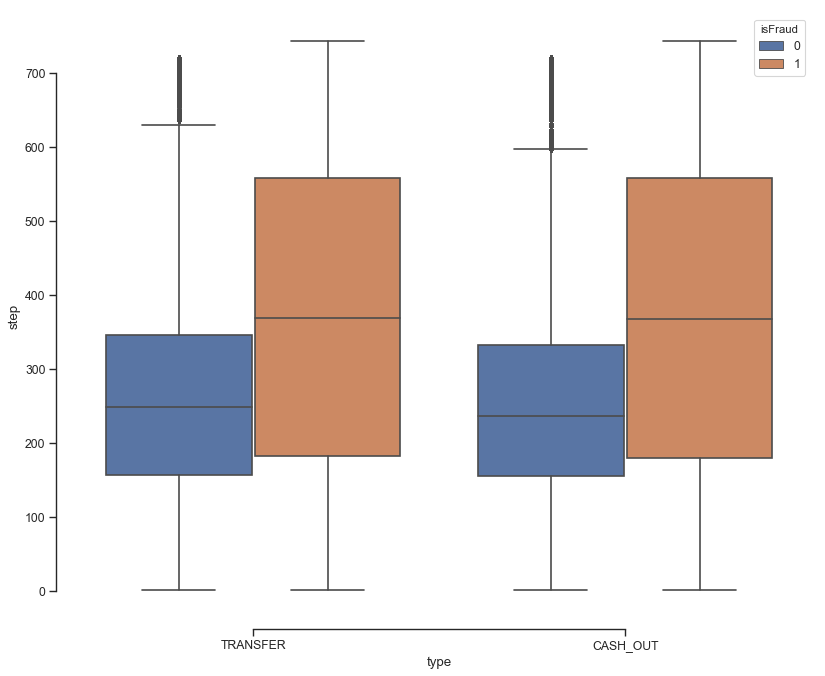

In [9]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(style="ticks")
sns.boxplot(x = "type", y = "step", hue ="isFraud", data = dat)
sns.despine(offset=10, trim=True)

The step variable seems to have some explanatory properties over the target variable. The median step is higher for fraudulent transactions for both type 'TRANSFER' and 'CASH_OUT'.

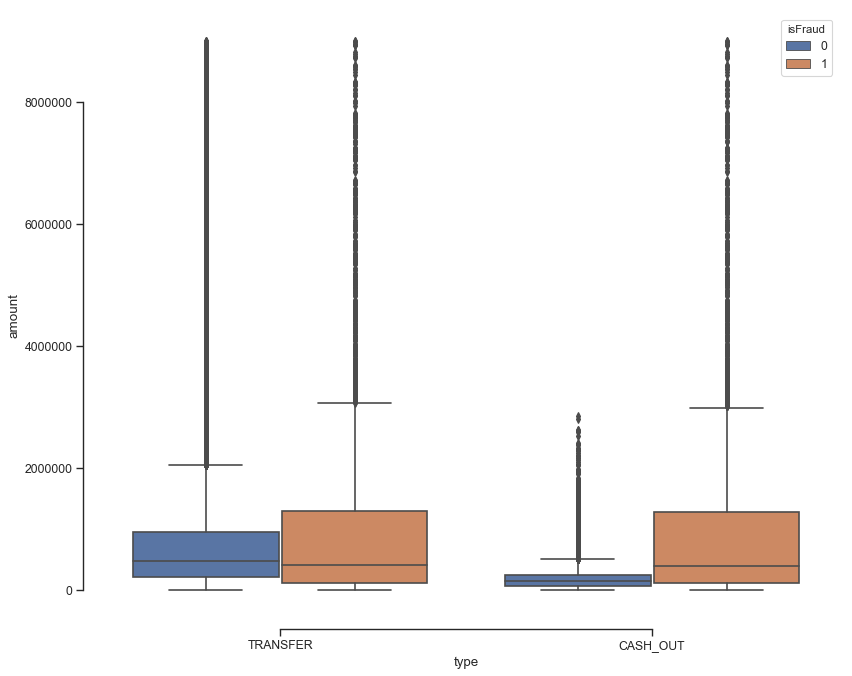

In [17]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(style="ticks")
sns.boxplot(x = "type", y = "amount", hue ="isFraud", data = dat.loc[dat.amount < 9000000])
sns.despine(offset=10, trim=True)

For type 'TRANSFER' the amount does not seem to separat fraudulent transactions from the rest very well, but for type 'CASH_OUT' the fraudulent transactions have a higher amount in general.

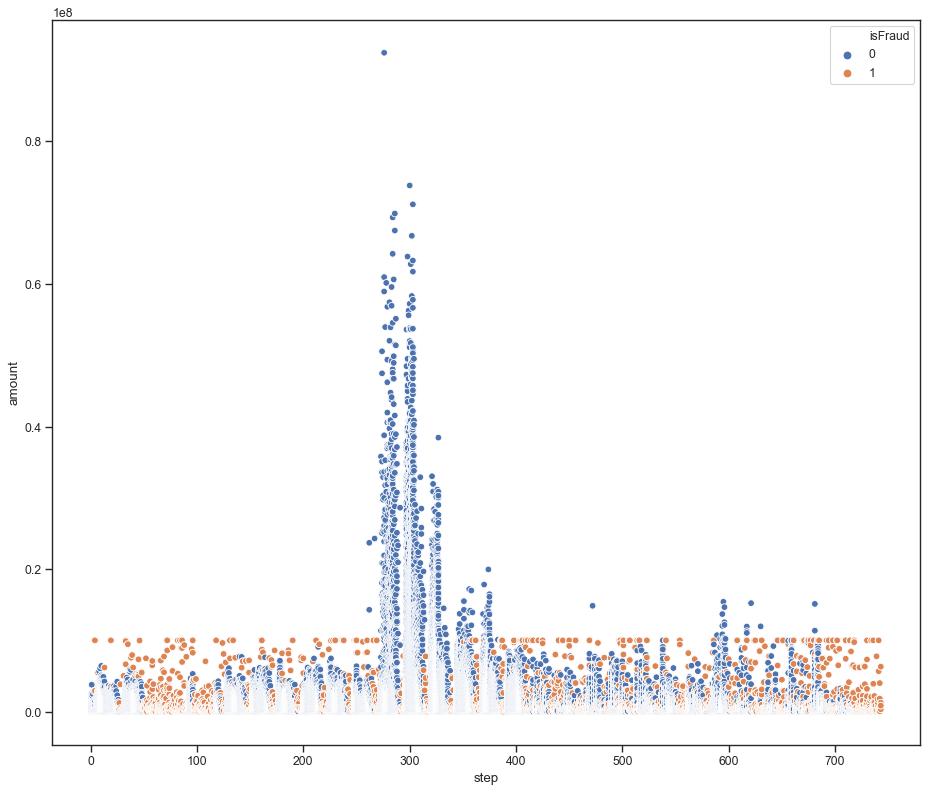

In [11]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "step", y = "amount", hue = "isFraud", data = dat)

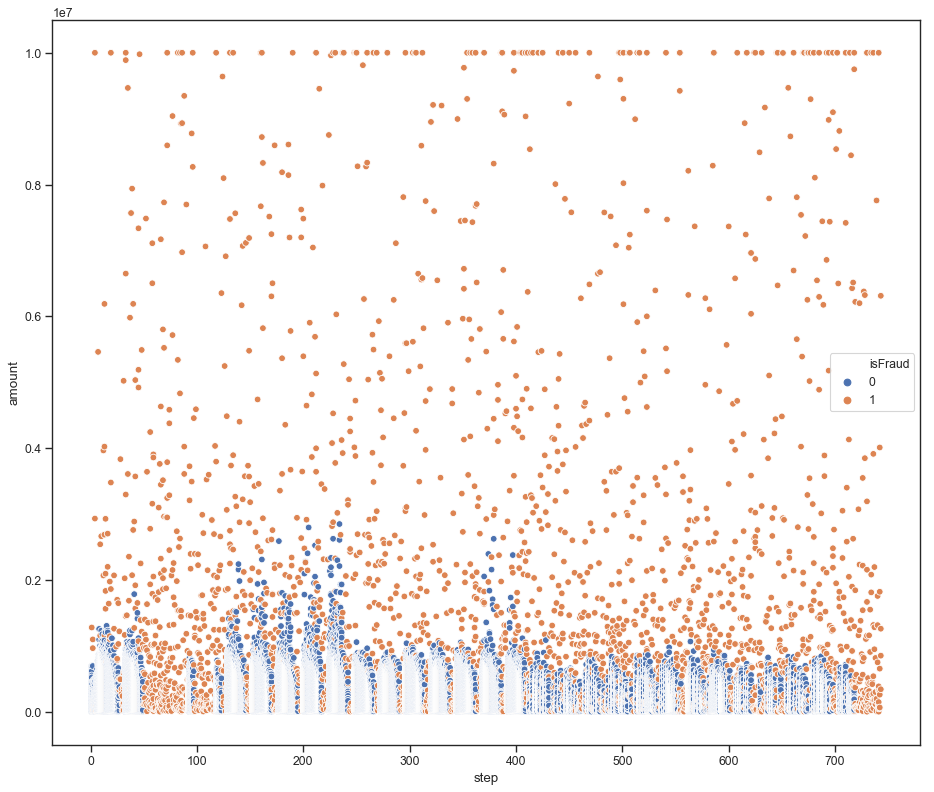

In [12]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "step", y = "amount", hue = "isFraud", data = dat.loc[dat.type == 'CASH_OUT'])

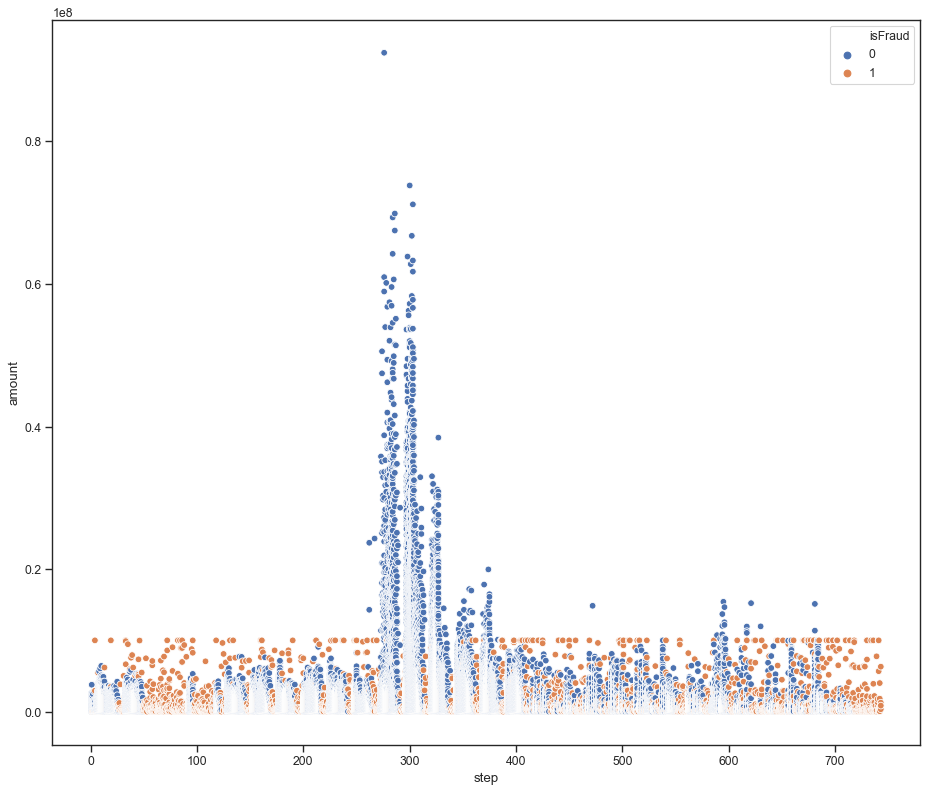

In [13]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "step", y = "amount", hue = "isFraud", data = dat.loc[dat.type == 'TRANSFER'])

The variables type, amount and step look to useful in seprating fraud from non-fraud, this is especially the case for the combination of type and amount, while step seems to be useful individually. 

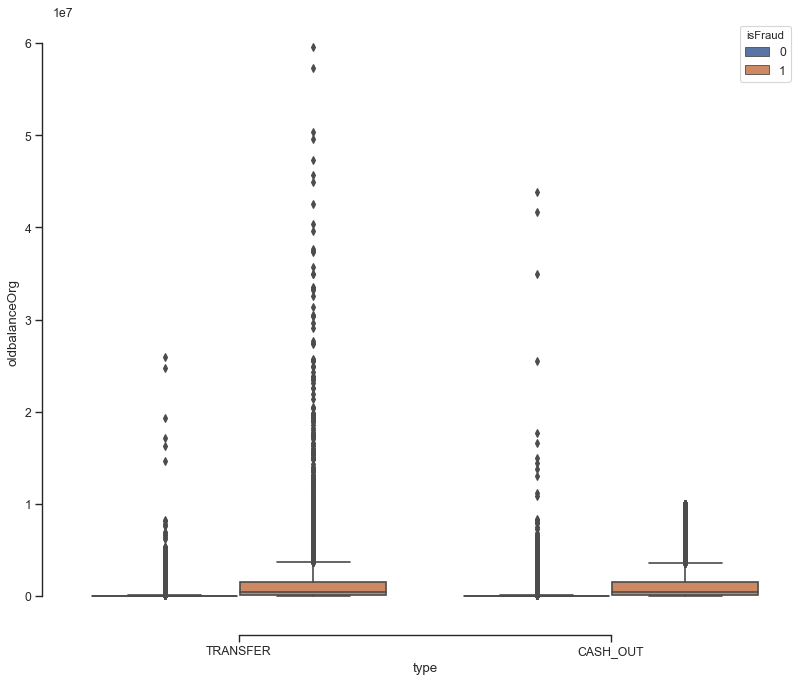

In [14]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(style="ticks")
sns.boxplot(x = "type", y = "oldbalanceOrg", hue ="isFraud", data = dat.loc[dat.oldbalanceOrg < float('Inf')])
sns.despine(offset=10, trim=True)

The fraudulent transactions have higher initial balance than the non fraudulent transactions. 

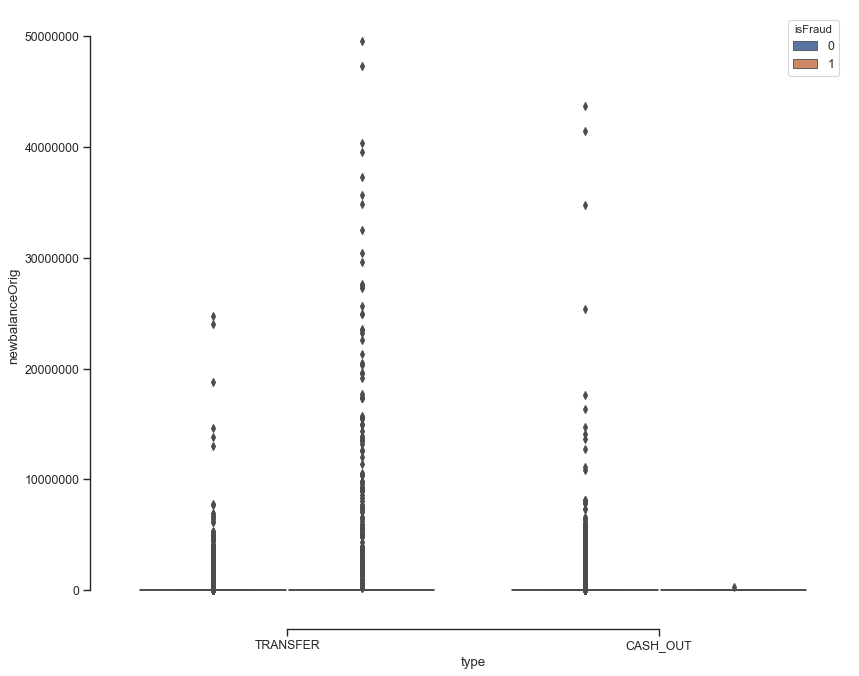

In [15]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(style="ticks")
sns.boxplot(x = "type", y = "newbalanceOrig", hue ="isFraud", data = dat)
#ax.set(ylim=(0,200))
plt.ticklabel_format(style='plain', axis='y')
sns.despine(offset=10, trim=True)

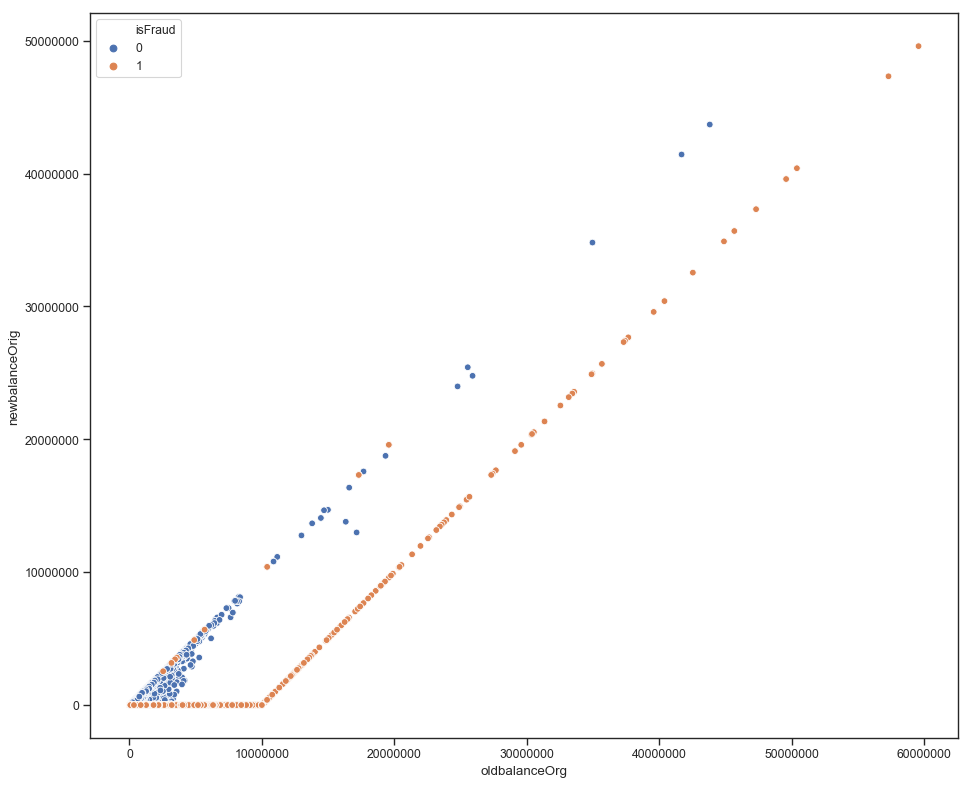

In [18]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "oldbalanceOrg", y = "newbalanceOrig", hue = "isFraud", data = dat)
plt.ticklabel_format(style='plain', axis='both')

There is an interesting pattern to the scatterplot of oldbalanceOrg and newbalanceOrig. Together these two variables seem to separat the fraud from the non fraud very well. Analyzing further with splitting between type 'TRANSFER' and 'CASH_OUT'.

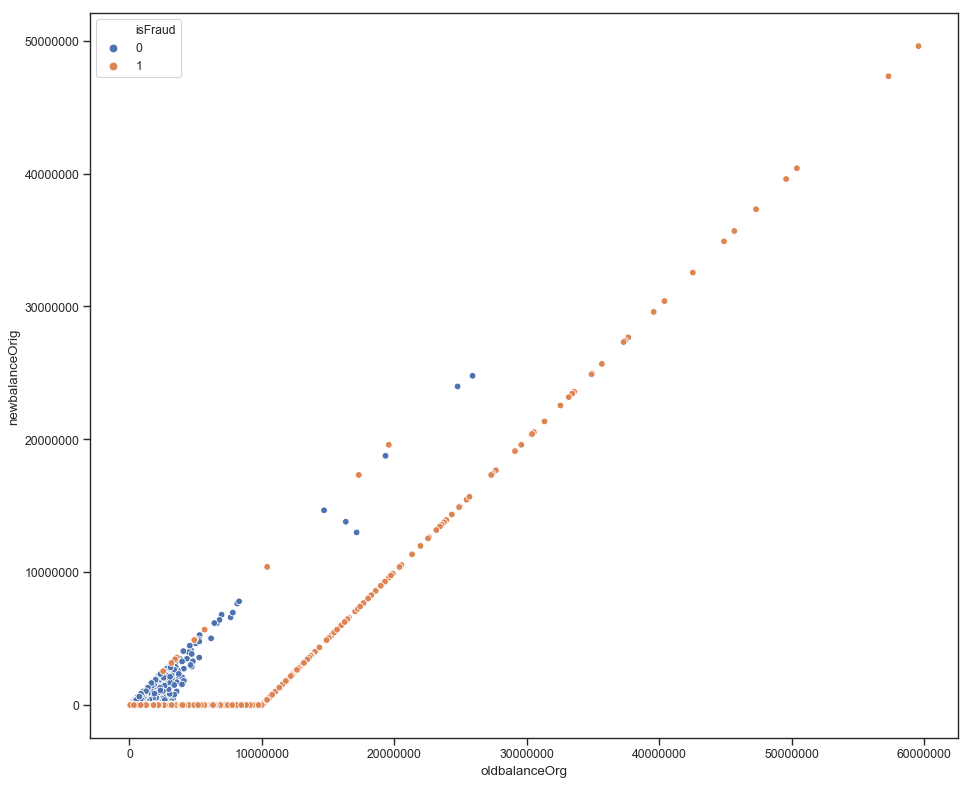

In [19]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "oldbalanceOrg", y = "newbalanceOrig", hue = "isFraud", data = dat.loc[dat.type == 'TRANSFER'])
plt.ticklabel_format(style='plain', axis='both')

The fraudulent transactions occor mainly when newbalanceOrig is 0 and oldbalanceOrg is between 0 and 10 000 000. In addition the transactions which where oldbalanceOrg is greater than 10 000 000 is highly correlated with newbalanceOrig but offset 1e7. The on fraudulent transactions does not have the same high correlation and are not offset. The fraudulent transactions make a shape that resemble relu activation function. For the fraudulent transactions above 10 000 000 it seems like everything is taken from the account, except 10 000 000, so where the difference between newbalanceOrig and oldbalanceOrg is equal to 10 000 000 is likely to be fraud.

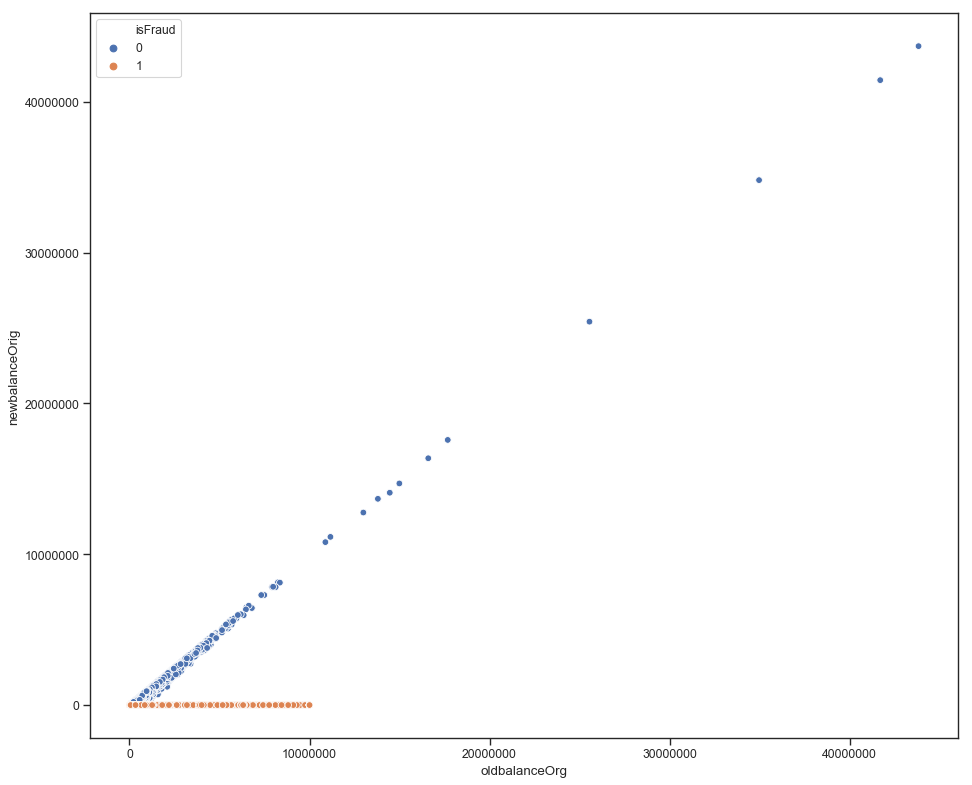

In [20]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "oldbalanceOrg", y = "newbalanceOrig", hue = "isFraud", data = dat.loc[dat.type == 'CASH_OUT'])
plt.ticklabel_format(style='plain', axis='both')

The variables newbalanceOrig and oldbalanceOrg combined with type 'CASH_OUT' also seems to have great predictive power over fraud. All fraudulent transactions have 0 in newbalanceOrig and between 0 and 10 000 000 in oldbalanceOrg.

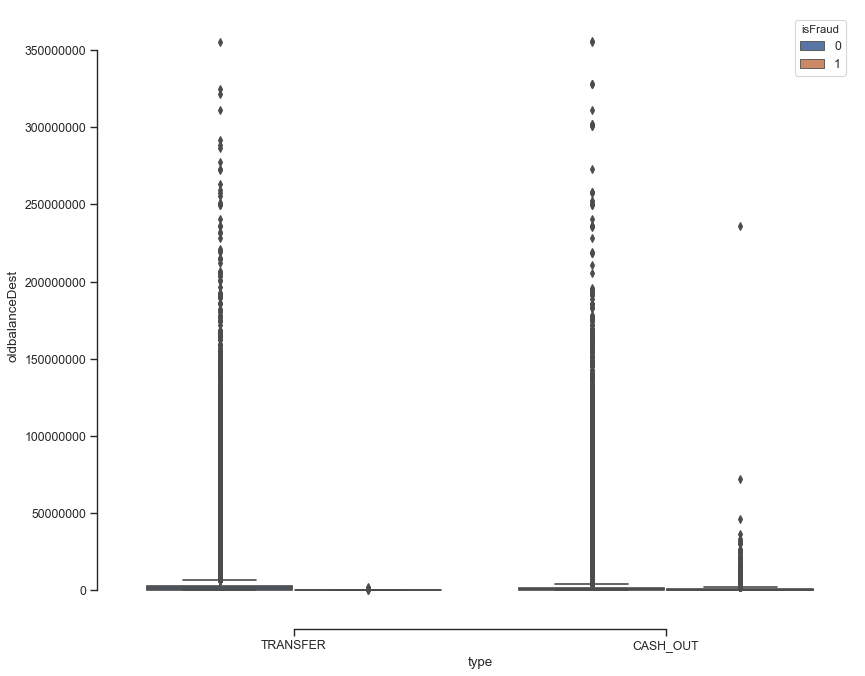

In [26]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(style="ticks")
sns.boxplot(x = "type", y = "oldbalanceDest", hue ="isFraud", data = dat)
#ax.set(ylim=(0,500))
plt.ticklabel_format(style='plain', axis='y')
sns.despine(offset=10, trim=True)

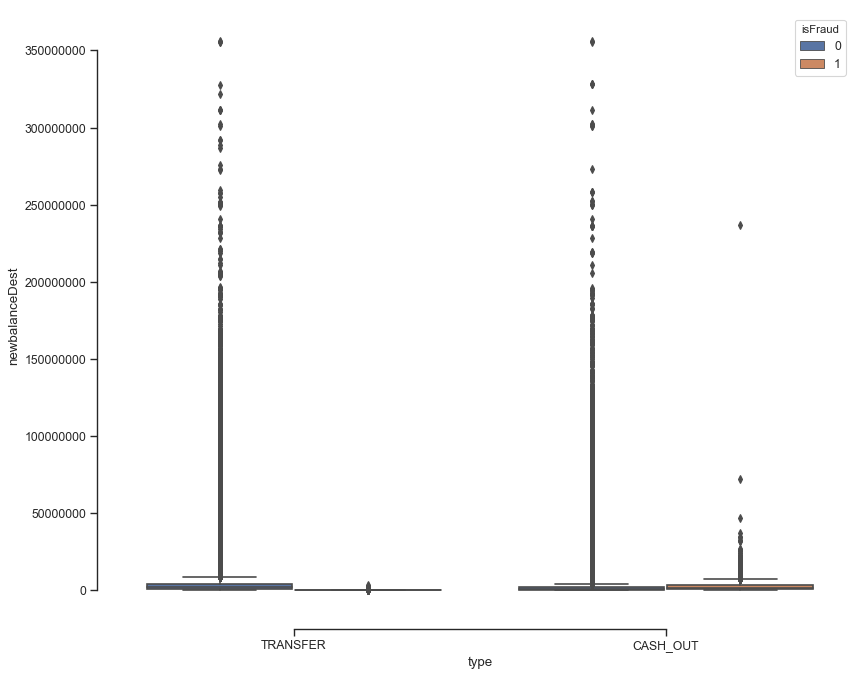

In [29]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(style="ticks")
sns.boxplot(x = "type", y = "newbalanceDest", hue ="isFraud", data = dat)
#ax.set(ylim=(0,5000))
plt.ticklabel_format(style='plain', axis='y')
sns.despine(offset=10, trim=True)

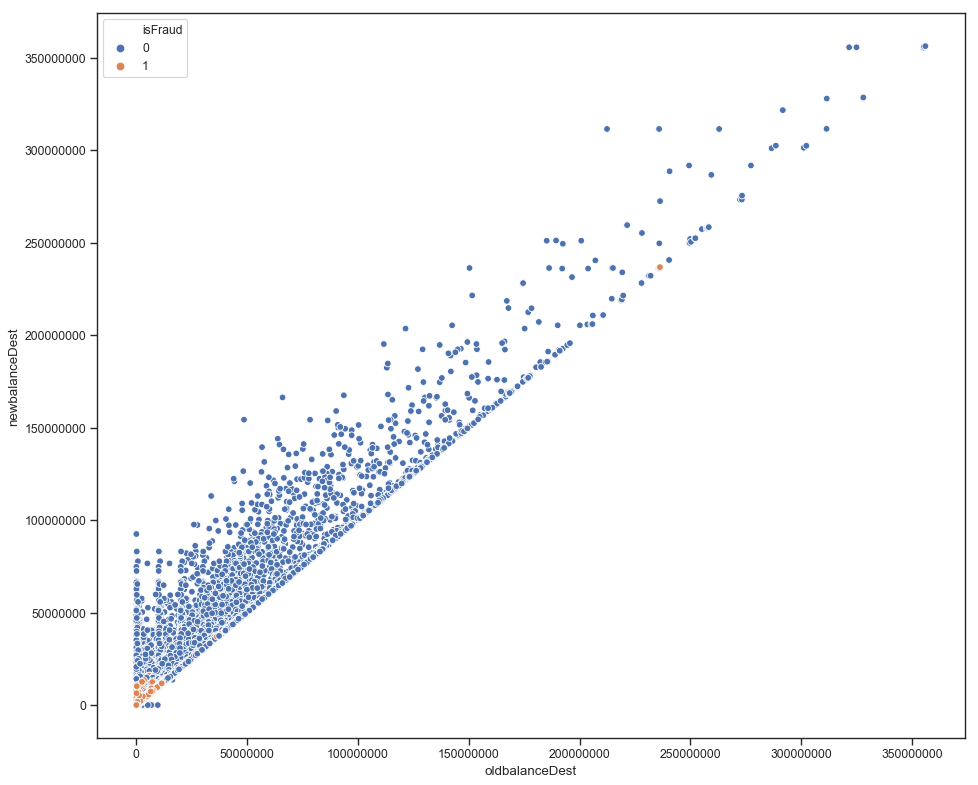

In [30]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "oldbalanceDest", y = "newbalanceDest", hue = "isFraud", data = dat)
plt.ticklabel_format(style='plain', axis='both')

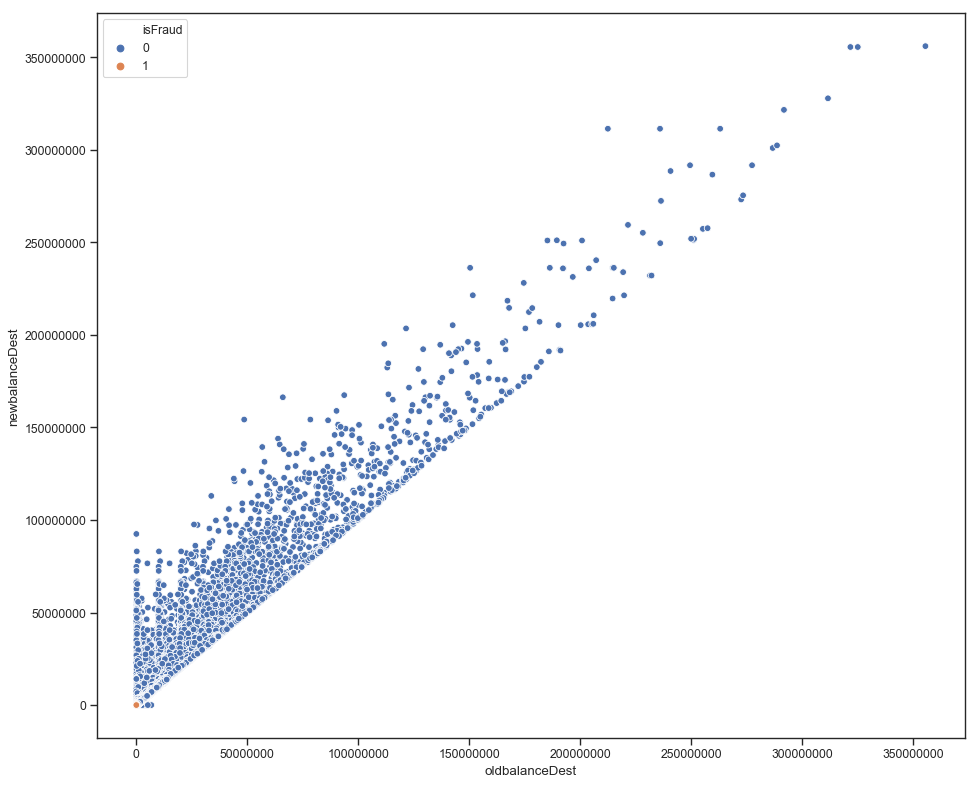

In [33]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "oldbalanceDest", y = "newbalanceDest", hue = "isFraud", data = dat.loc[dat.type == 'TRANSFER'])
plt.ticklabel_format(style='plain', axis='both')

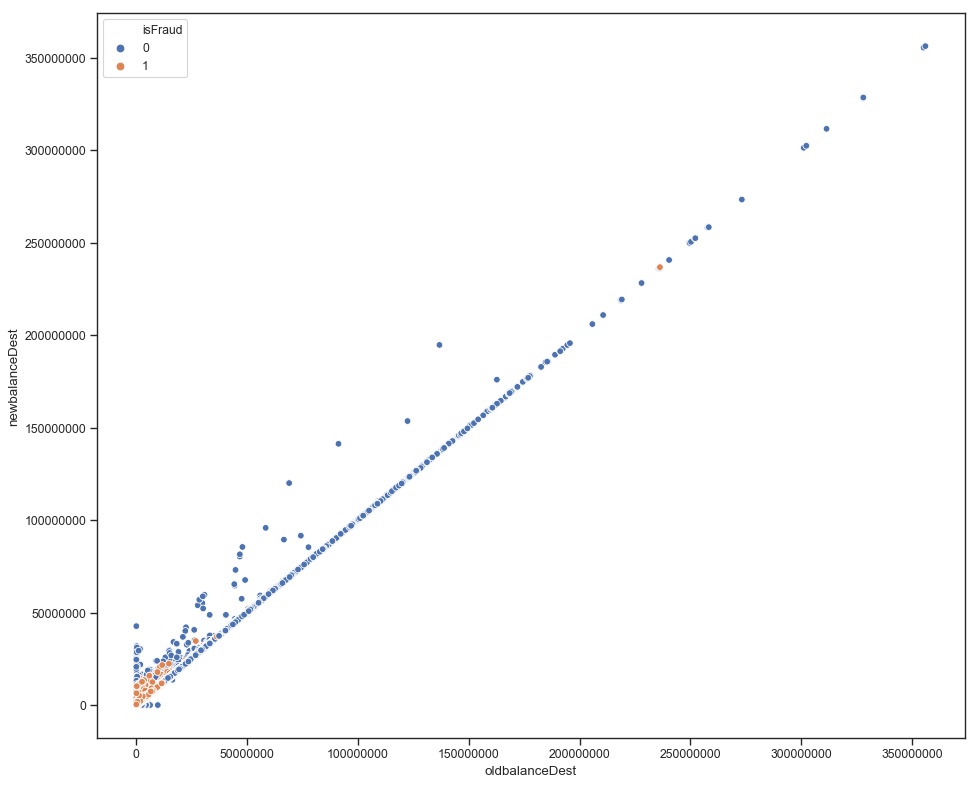

In [34]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "oldbalanceDest", y = "newbalanceDest", hue = "isFraud", data = dat.loc[dat.type == 'CASH_OUT'])
plt.ticklabel_format(style='plain', axis='both')

[(0, 20000000), (0, 5000000)]

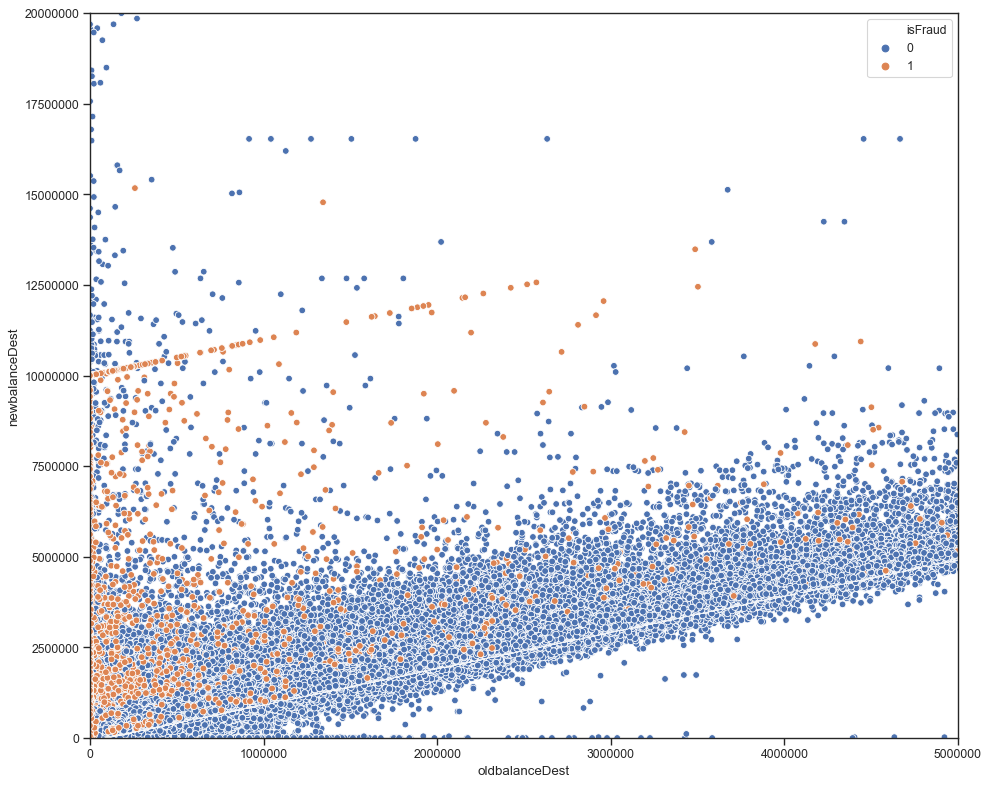

In [38]:
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x = "oldbalanceDest", y = "newbalanceDest", hue = "isFraud", data = dat.loc[dat.type == 'CASH_OUT'])
plt.ticklabel_format(style='plain', axis='both')
ax.set(ylim=(0,20000000), xlim =(0,5000000))

For type 'CASH_OUT' fraud seems to follow a different pattern than non fraud with the respect to the variables newbalanceDest and oldbalanceDest. Fraudulent transactions have does not follow the same linear relationship as the on fruadulent transactions. Fraud appear to be more centered around oldbalanceDest 0, which suggests that the accounts are empty before 'CASH_OUT' transactions. However, I do not see how a 'CASH_OUT' type transaction has a destinaton account. For non fraud: accounts with higher balance have a tendency to receive high amounts, while accounts with lower balance have a tendency to recieve low amounts.